In [1]:
#import moduls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


### Numerical Plots

* Distribution: Hist, KDE(Kernel destiny estimate), displot()
* Bar Plot
* Count Plot
* Facet Plot: tạo ra một lưới 2d gồm các bảng được xác định  bởi các biến tạo thành các hàng và cột
* Box plot: phương pháp mô tả bằng đồ thị các nhóm  dữ liệu số thông qua các phần tử của chúng
* Join Plot
* Pair Plot
* Heat Map:Một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở 2 chiều

## Distribution Plot

In [6]:
tips_df = sns.load_dataset('tips')

In [6]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


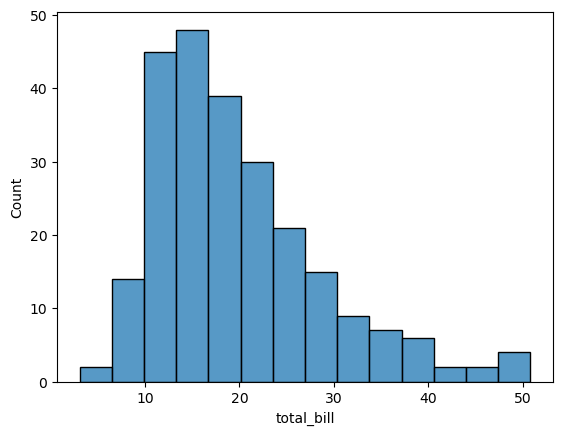

In [7]:
sns.histplot(data=tips_df["total_bill"]);

In [8]:
tips_df["total_bill"].value_counts().sort_values()

16.47    1
26.41    1
11.24    1
15.06    1
18.35    1
        ..
20.29    2
20.69    2
21.01    2
15.69    2
13.42    3
Name: total_bill, Length: 229, dtype: int64

## KDE plot 
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a data, anglagous to a histogram
* KDE represent the data using a continuous probability density curve in one or more dimentions

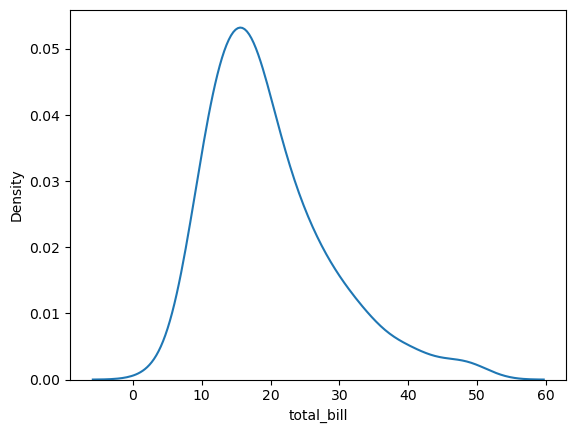

In [12]:
sns.kdeplot(data=tips_df ['total_bill']);

## Displot
* Informative distribution summaries
* Satatical anlyses require knowledge about the distribution of variables in your dataset
* The seaborn function displot() support several approaches to visualizing distribution.These include classis techniques like histogram and computationally-intensive approaches like kernel density estimate

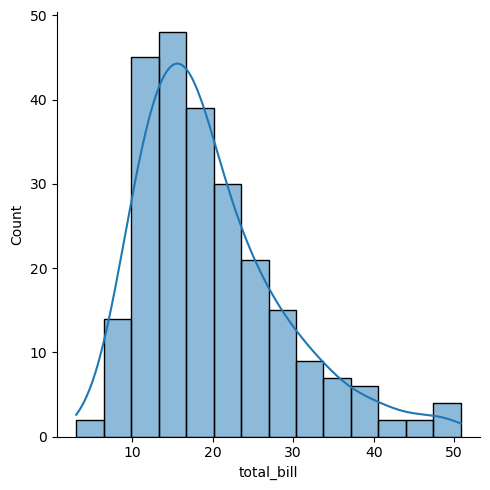

In [15]:
sns.displot(data=tips_df, x="total_bill", kde = True);

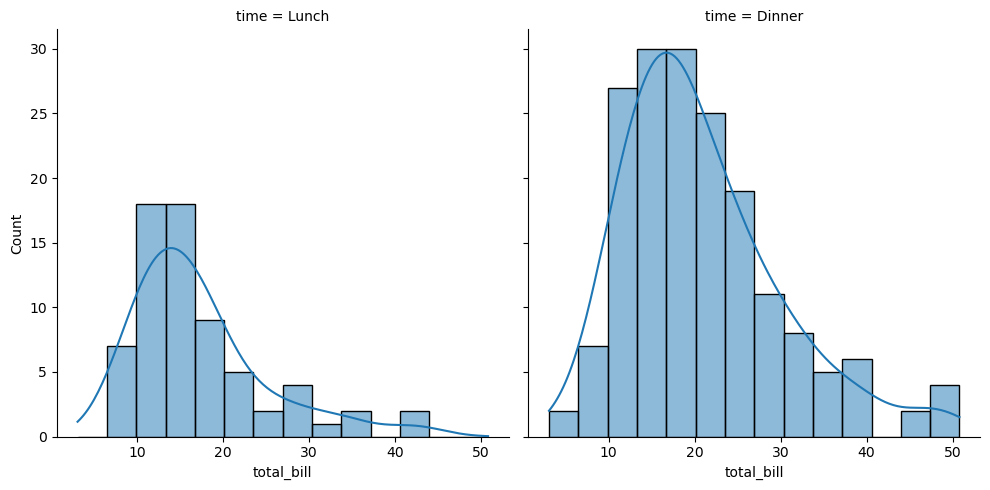

In [16]:
sns.displot(data=tips_df, x="total_bill", col="time", kde = True);

## Categorical plots

## Bar plots

In [17]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


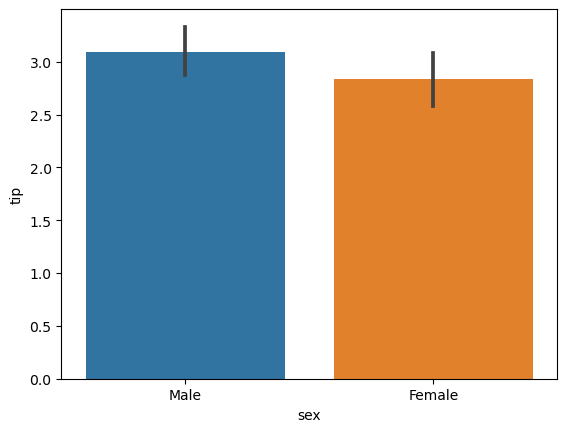

In [18]:
sns.barplot(data=tips_df, x = "sex", y="tip", estimator=np.mean);

## Count Plot

In [19]:
tips_df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

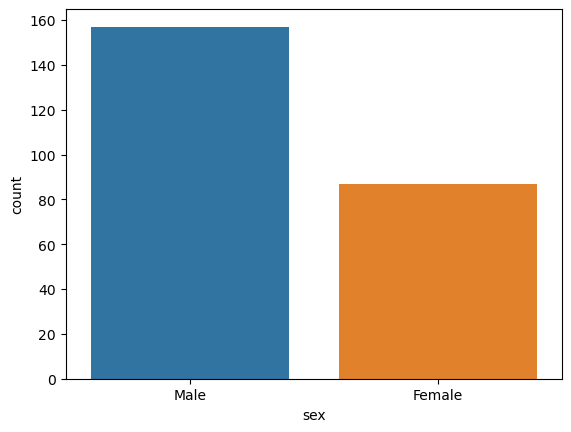

In [20]:
sns.countplot(data=tips_df, x="sex");

## Box Plot

Box plot is a good indication of how the values in the data are spread out("minimum", first quartile(Q1), median, third quartile(Q3), and "maximum")


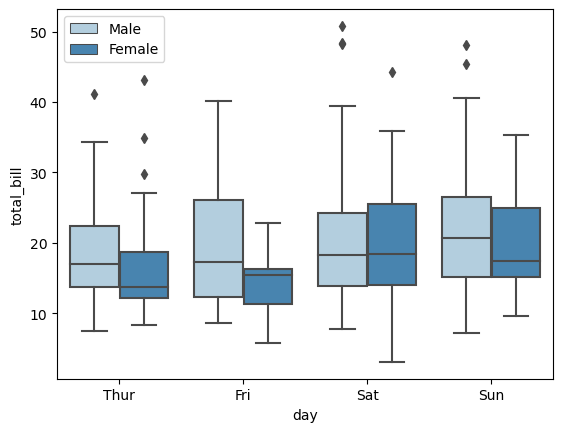

In [26]:
sns.boxplot(data=tips_df, x="day", y="total_bill", hue="sex", palette="Blues");

plt.legend(loc=0);

## Facet Grid

* FacetGrid can be drawn with up to three dimentions: row, col and hue
* The main approach for visualizing data on this grid is with the FaceGrid.map() method.

In [27]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


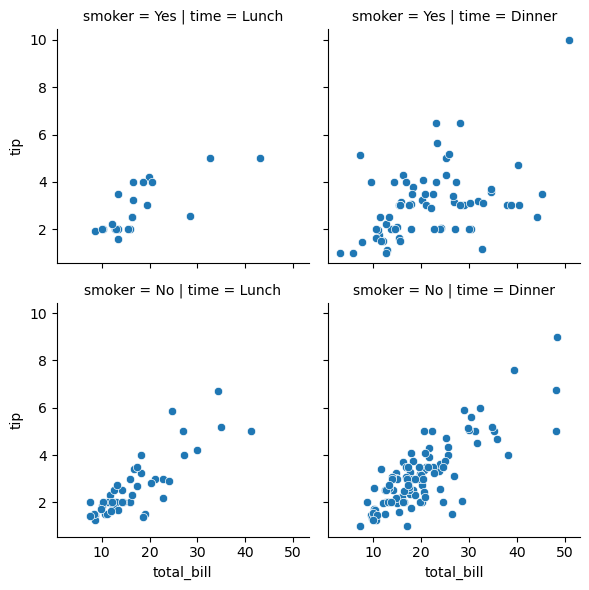

In [29]:
tips_fg = sns.FacetGrid(data=tips_df, row="smoker", col="time") # create a class instanceof FacetGrid class
tips_fg.map(sns.scatterplot, 'total_bill', 'tip');

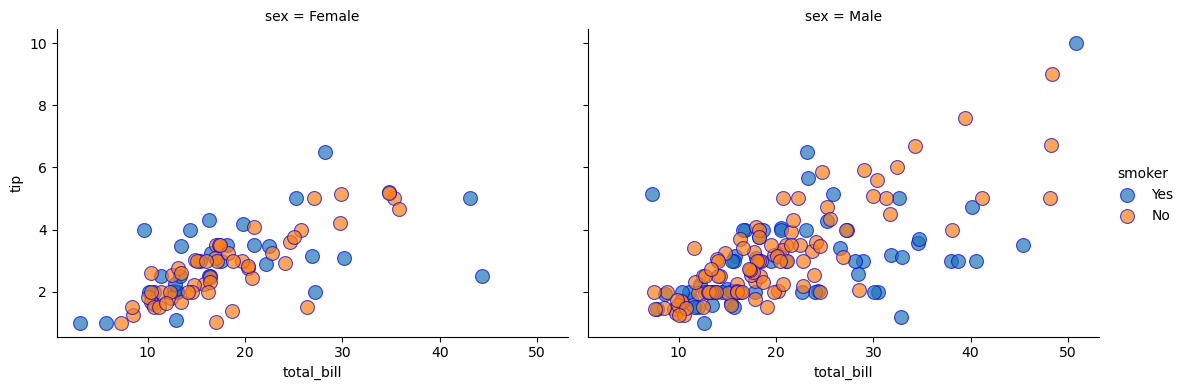

In [34]:
new_fg = sns.FacetGrid(data=tips_df, col="sex",
                       hue="smoker",
                      col_order = ["Female", "Male"],
                      height = 4, aspect = 1.4)
new_fg.map(sns.scatterplot, 'total_bill', 'tip', s= 100, edgecolor='b', alpha=.7);

new_fg.add_legend();

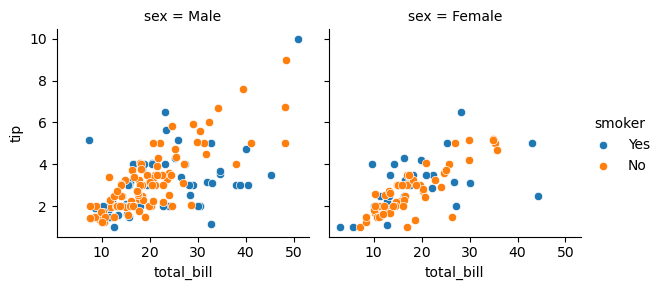

In [10]:
new_fg = sns.FacetGrid(data=tips_df, col="sex",
                      hue='smoker')
new_fg.map(sns.scatterplot, 'total_bill', 'tip');
new_fg.add_legend();

## Joint Plot
* Joint distribution between two variable along with each variable marginal distribution

In [11]:
penguins_df = sns.load_dataset('penguins')

In [12]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


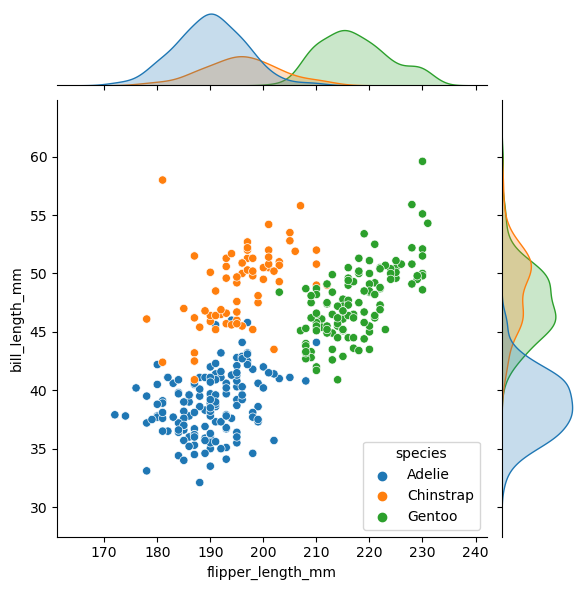

In [14]:
sns.jointplot(data=penguins_df, x="flipper_length_mm", y="bill_length_mm", hue="species");

## Pair Plots

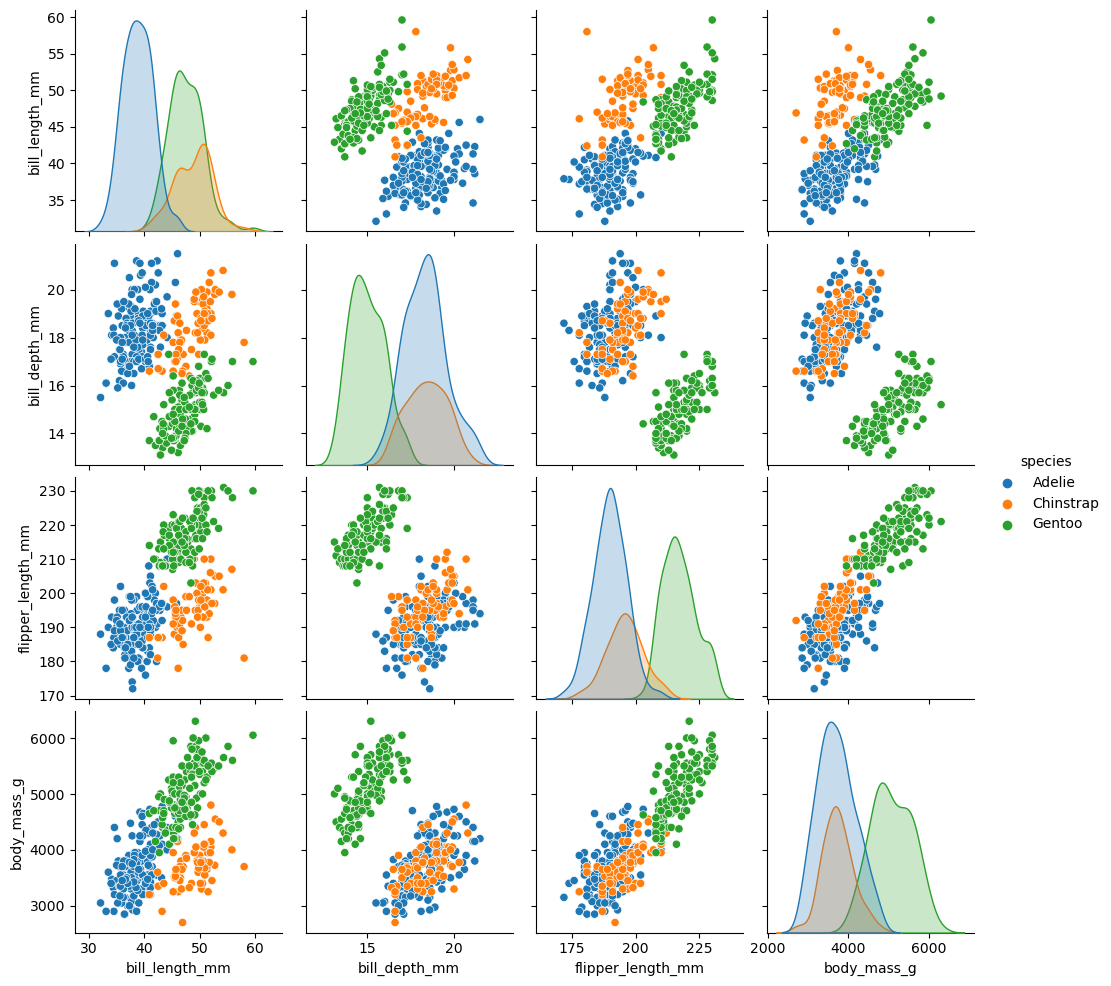

In [17]:
sns.pairplot(data=penguins_df, hue="species");

## Heatmaps

* Describing density or intensity of variables, visualize patterns, variance, and even anomalies

In [18]:
flights_df = sns.load_dataset("flights")

In [19]:
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [20]:
flights = pd.pivot_table(flights_df, index="month", columns="year", values="passengers")

In [21]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


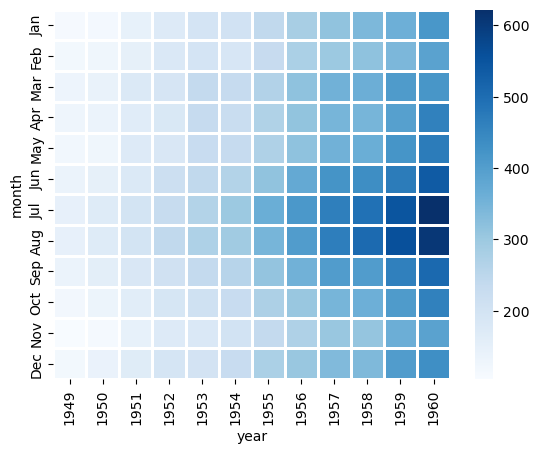

In [29]:
sns.heatmap(data=flights, cmap="Blues", linecolor="white", linewidths=1);